<a href="https://colab.research.google.com/github/felipefreitasbr/quarentena-de-dados/blob/master/Aula_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

#configurando a precisão de casas decimais para as variáveis do tipo float
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [3]:
dados.shape

(137844, 137)

In [4]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

In [5]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [6]:
notas = dados[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].dropna()
notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
notas.shape

(97270, 5)

In [7]:
notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [8]:
correl_notas = notas.corr()
correl_notas

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


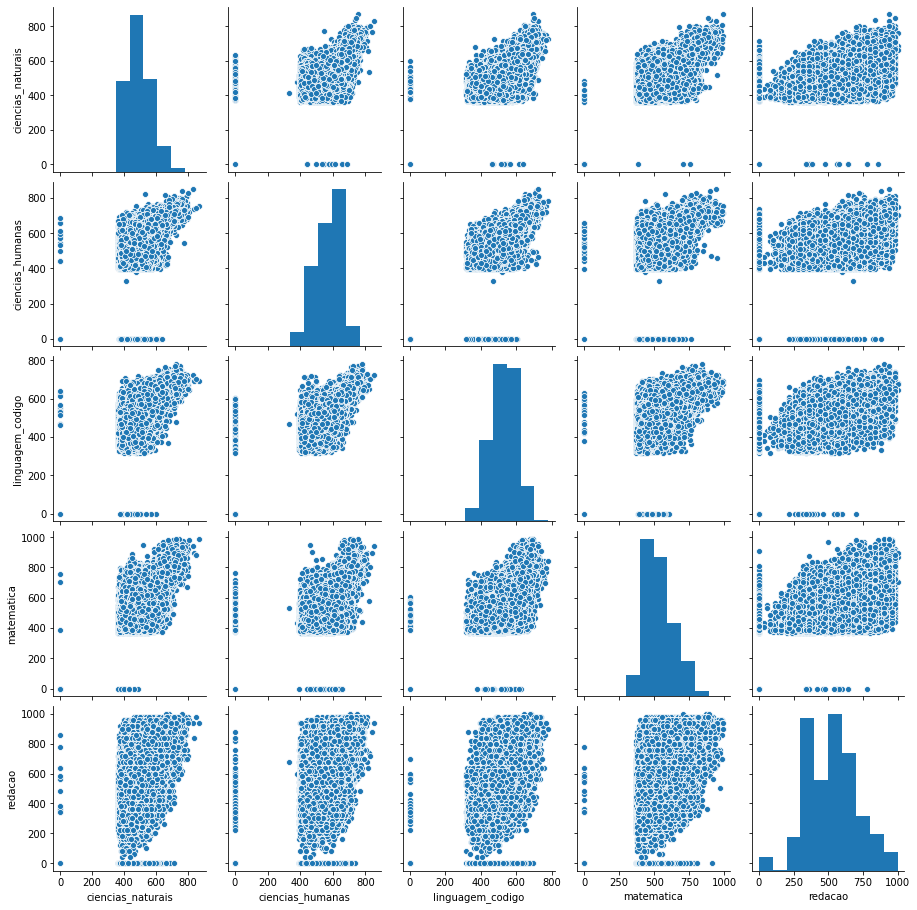

In [9]:
import seaborn as sns

sns.pairplot(notas)

## Desafio 1

Se a pessoa não teve presença ou foi eliminada, preencha a nota com 0.

In [0]:
dados2 = dados.copy()
dados2.loc[dados2['TP_PRESENCA_CN'].isin([0,2]), 'NU_NOTA_CN'] = 0
#dados2.query('TP_PRESENCA_CN == 0 | TP_PRESENCA_CN == 2')[['TP_PRESENCA_CN', 'NU_NOTA_CN']].sort_values('TP_PRESENCA_CN', ascending=False)
dados2.loc[dados2['TP_PRESENCA_CH'].isin([0,2]), 'NU_NOTA_CH'] = 0
dados2.loc[dados2['TP_PRESENCA_LC'].isin([0,2]), 'NU_NOTA_LC'] = 0
dados2.loc[dados2['TP_PRESENCA_MT'].isin([0,2]), 'NU_NOTA_MT'] = 0

## Desafio 2

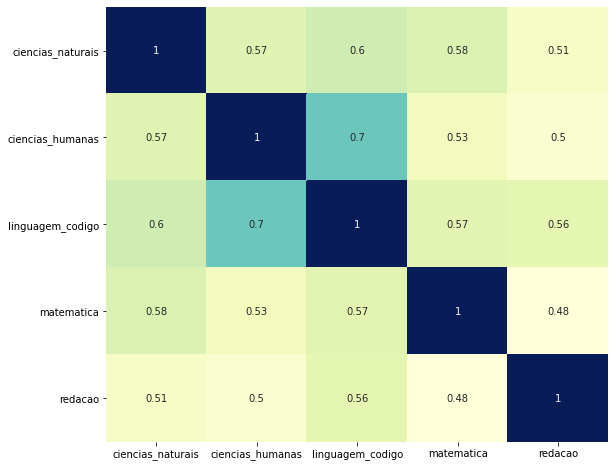

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,8))
sns.heatmap(correl_notas, annot=True, cmap="YlGnBu", cbar=False)

#labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']
#sns.heatmap(correl_notas, annot=True, cmap="YlGnBu", cbar=False, xticklabels = labels, yticklabels = labels)

## Desafio 3

Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas.

In [12]:
dados[['NU_INSCRICAO', 'CO_PROVA_CN','TX_RESPOSTAS_CN', 'TX_GABARITO_CN', 'NU_NOTA_CN']].dropna().head(10)

,NU_INSCRICAO,CO_PROVA_CN,TX_RESPOSTAS_CN,TX_GABARITO_CN,NU_NOTA_CN
1,180012890374,448.00,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,523.10
2,180008223824,447.00,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,409.20
3,180007859645,450.00,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,452.30
6,180009943059,450.00,BBCCAAECEACBCADDAECABCEBDDADCCEACDBCEBCAABDEB,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,428.50
8,180008290373,449.00,CEDADAADADEBBAEABCBEDEBCEBEEDCAACEADBDEBDCBDE,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,491.80
9,180013306363,450.00,ADDCEEBCDDBCADCCBCBBACDEBBACAAAADACACADEEBCEB,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,568.00
10,180010531930,447.00,AEDBDACADEDABAEDADBACCAADBDEAABCBACBEAAABAABC,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,630.20
11,180011056962,450.00,ADBAECCAAACBEEDABBDBACDBECADDDDEBDBEBACEBDCCE,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,591.40
12,180007532263,447.00,DCEBBEBEEEDDBDBCCABDCABACEBCBCDCEDBBCDAABBDCE,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,414.20
13,180009779858,448.00,EBDECAADDCCBBCEBCABEDCCDDACDDDBCBADCDDBEDEEBD,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,487.50


In [0]:
teste = dados[['NU_INSCRICAO', 'CO_PROVA_CN','TX_RESPOSTAS_CN', 'TX_GABARITO_CN', 'NU_NOTA_CN']].dropna().head(1)

In [0]:
def corretor_automatico(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')
    return sum(a==b for a, b in zip(respostas, gabarito))

In [15]:
#teste['ACERTOS'] = teste.apply(corrige_questoes, materia = 'CN', axis = 1)
print(teste['TX_RESPOSTAS_CN'].values)
print(teste['TX_GABARITO_CN'].values)
teste.apply(corretor_automatico, materia = 'CN', axis = 1)

['CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC']
['BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA']


1    11
dtype: int64

In [16]:
dados2 = dados2.dropna()

dados2['NU_RESPOSTAS_CORRETAS_CN'] = dados2.apply(corretor_automatico, materia='CN', axis=1)
dados2['NU_RESPOSTAS_CORRETAS_CH'] = dados2.apply(corretor_automatico, materia='CH', axis=1)
dados2['NU_RESPOSTAS_CORRETAS_LC'] = dados2.apply(corretor_automatico, materia='LC', axis=1)
dados2['NU_RESPOSTAS_CORRETAS_MT'] = dados2.apply(corretor_automatico, materia='MT', axis=1)

dados2.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,NU_RESPOSTAS_CORRETAS_CN,NU_RESPOSTAS_CORRETAS_CH,NU_RESPOSTAS_CORRETAS_LC,NU_RESPOSTAS_CORRETAS_MT
6,180009943059,2018,2701308,Cajueiro,27,AL,17.00,F,0.00,3,1,"2,709,400.00",Viçosa,27.00,AL,2,0,2,1.00,0,"27,026,744.00","2,701,308.00",Cajueiro,27.00,AL,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,120.00,120.00,80.00,140.00,100.00,560.00,B,B,A,F,3,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,C,A,A,A,B,A,11,9,15,8
10,180010531930,2018,5002704,Campo Grande,50,MS,18.00,M,0.00,3,1,"5,002,704.00",Campo Grande,50.00,MS,2,0,2,1.00,0,"50,022,997.00","5,002,704.00",Campo Grande,50.00,MS,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,140.00,200.00,160.00,160.00,140.00,800.00,D,C,C,B,4,E,A,C,C,B,A,C,A,B,A,B,A,A,B,B,B,E,B,B,B,B,A,20,24,29,25
11,180011056962,2018,3509502,Campinas,35,SP,17.00,F,0.00,1,1,"3,509,502.00",Campinas,35.00,SP,2,0,2,1.00,0,"35,018,879.00","3,509,502.00",Campinas,35.00,SP,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,160.00,140.00,120.00,140.00,120.00,680.00,D,D,C,F,2,F,A,B,D,B,A,B,B,B,A,B,A,B,C,A,A,D,B,A,B,B,A,17,18,27,14
18,180011638661,2018,3203007,Iúna,32,ES,18.00,F,0.00,3,1,"3,204,906.00",São Mateus,32.00,ES,2,0,2,1.00,0,"32,048,920.00","3,203,007.00",Iúna,32.00,ES,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.00,120.00,120.00,100.00,120.00,0.00,460.00,E,E,D,D,4,I,A,B,D,C,B,B,B,B,B,A,A,B,D,A,B,D,A,B,B,B,A,12,10,14,14
24,180008387261,2018,5003702,Dourados,50,MS,18.00,F,0.00,1,1,"5,003,702.00",Dourados,50.00,MS,2,0,2,1.00,0,"50,016,482.00","5,003,702.00",Dourados,50.00,MS,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,140.00,100.00,600.00,E,E,A,A,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,A,B,B,B,A,6,18,26,12


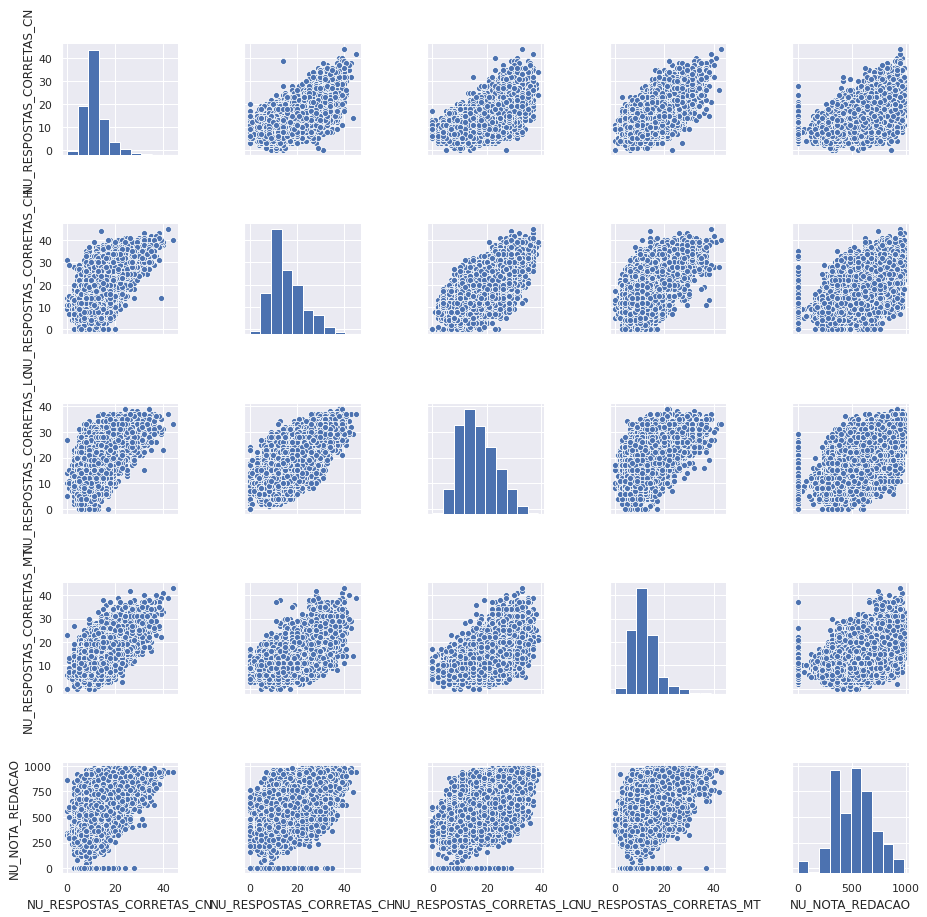

In [17]:
respostas_certas_redacao = dados2[['NU_RESPOSTAS_CORRETAS_CN', 'NU_RESPOSTAS_CORRETAS_CH', 'NU_RESPOSTAS_CORRETAS_LC', 'NU_RESPOSTAS_CORRETAS_MT', 'NU_NOTA_REDACAO']]
sns.set()
sns.pairplot(respostas_certas_redacao)

## Desafio 5

Quais questões tiveram mais erros?

In [0]:
def corretor_questoes(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')
    return pd.Series([int(a==b) for a, b in zip(respostas, gabarito)])

In [19]:
print(teste['TX_RESPOSTAS_CN'].values)
print(teste['TX_GABARITO_CN'].values)
teste.apply(corretor_questoes, materia = 'CN', axis = 1)

['CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC']
['BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA']


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0


In [20]:
#Examinando os acertos nas provas de matemática
dados2.groupby('CO_PROVA_MT')['NU_RESPOSTAS_CORRETAS_MT'].describe()

,count,mean,std,min,25%,50%,75%,max
CO_PROVA_MT,,,,,,,,
459.00,"6,747.00",11.72,4.97,0.00,8.00,11.00,14.00,43.00
460.00,"6,622.00",11.78,5.07,0.00,8.00,11.00,14.00,40.00
461.00,"6,580.00",11.72,5.07,0.00,8.00,11.00,14.00,38.00
462.00,"6,599.00",11.62,4.90,0.00,8.00,11.00,14.00,42.00
466.00,1.00,12.00,nan,12.00,12.00,12.00,12.00,12.00
470.00,19.00,8.58,3.08,3.00,7.00,8.00,10.00,16.00


In [26]:
prova_matematica_azul = dados2.query('CO_PROVA_MT == 459')
acertos = prova_matematica_azul.apply(corretor_questoes, materia = 'MT', axis = 1)
acertos_por_questao = pd.DataFrame(acertos.sum())
acertos_por_questao.reset_index(inplace=True)
acertos_por_questao.columns = ['Questão', 'Acertos']
acertos_por_questao['Questão'] = acertos_por_questao['Questão'] + 1
acertos_por_questao['Percentual de alunos'] = acertos_por_questao['Acertos']/6747
acertos_por_questao['Caderno'] = 'Azul'
acertos_por_questao.head()

,Questão,Acertos,Percentual de alunos,Caderno
0,1,1523,0.23,Azul
1,2,1513,0.22,Azul
2,3,1322,0.20,Azul
3,4,1110,0.16,Azul
4,5,2123,0.31,Azul


In [0]:
prova_matematica_amarela = dados2.query('CO_PROVA_MT == 460')
acertos = prova_matematica_amarela.apply(corretor_questoes, materia = 'MT', axis = 1)
acertos_por_questao2 = pd.DataFrame(acertos.sum())
acertos_por_questao2.reset_index(inplace=True)
acertos_por_questao2.columns = ['Questão', 'Acertos']
acertos_por_questao2['Questão'] = acertos_por_questao2['Questão'] + 1
acertos_por_questao2['Percentual de alunos'] = acertos_por_questao2['Acertos']/6622
acertos_por_questao2['Caderno'] = 'Amarelo'
acertos_por_questao = acertos_por_questao.append(acertos_por_questao2)

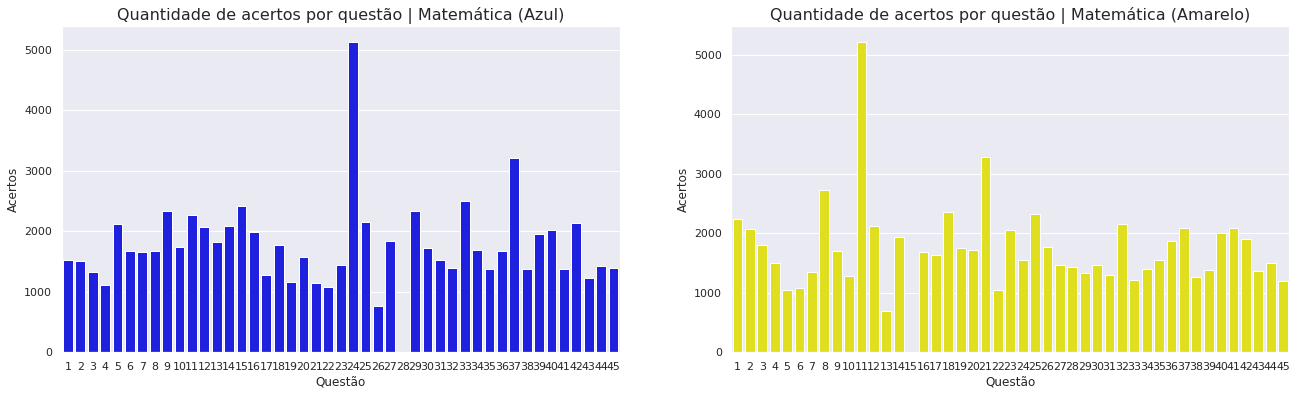

In [40]:
plt.figure(figsize=(22, 6))
  
graf1 = plt.subplot(1,2,1)
caderno = acertos_por_questao.query('Caderno == "Azul"')
sns.barplot(x='Questão', y='Acertos', data=caderno, color='Blue')
plt.title('Quantidade de acertos por questão | Matemática (Azul)', fontsize = 16)

graf2 = plt.subplot(1,2,2)
caderno = acertos_por_questao.query('Caderno == "Amarelo"')
sns.barplot(x='Questão', y='Acertos', data=caderno, color='Yellow')
plt.title('Quantidade de acertos por questão | Matemática (Amarelo)', fontsize = 16)

plt.show()

As mesmas questões são distribuídas em diferente ordem, nos respectivos cadernos de prova (Azul, Amarelo, Rosa, etc.).

As estatísticas descritivas mostram que não houve diferença de desempenho entre diferentes cadernos. Ao plotar o acerto por questão, temos motivos para acreditar que a questão 24 da prova azul é a mesma da 11 da prova amarela, devido ao grande número de acerto.
O fato de não haver nenhum acerto para as questões 28 e 15, das provas azul e amarela, respectivamente, levantam suspeita de que há algo errado nos dados.